# Dutch-Floral-Painting: ProcessImages
by Sonia Hashim

In [0]:
from enum import Enum
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt
import random
from math import floor
import re 

In [0]:
# Load names of images and ground truth segmentation maps 
dir_maps = 'trimaps'
dir_ims = 'jpg'
dir_processed = 'processed'
ls_maps = os.listdir(dir_maps)
ls_images = os.listdir(dir_ims)
ls_maps.remove('.DS_Store')

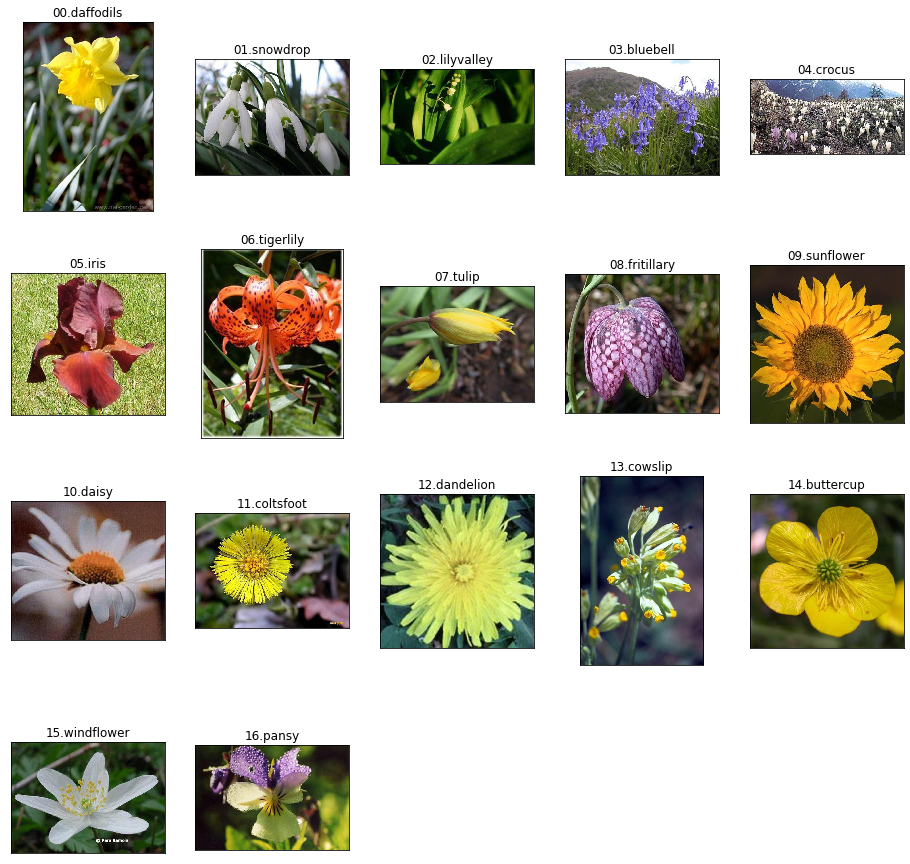

In [0]:
# Generate images (1 flower from each category)
x = list(range(0,17))
labels = [name for name in os.listdir('processed')]
labels.remove('.DS_Store')
labels.sort()

plt.figure(figsize=(16, 16))
for ix in x: 
  fname = 'image_{}.jpg'.format(str(80*ix+random.randint(0,80)).zfill(4))
  im = Image.open(dir_ims+'/'+fname)
  ax = plt.subplot(4, 5, ix+1)
  plt.title(labels[ix])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.imshow(im)

In [0]:
print("The total number of images is {}.".format(len(ls_images)))
print("The total number of ground truth segmentation maps is {}.".format(len(ls_maps)))

The total number of images is 1360.
The total number of ground truth segmentation maps is 847.


In [0]:
labels

['00.daffodils',
 '01.snowdrop',
 '02.lilyvalley',
 '03.bluebell',
 '04.crocus',
 '05.iris',
 '06.tigerlily',
 '07.tulip',
 '08.fritillary',
 '09.sunflower',
 '10.daisy',
 '11.coltsfoot',
 '12.dandelion',
 '13.cowslip',
 '14.buttercup',
 '15.windflower',
 '16.pansy']

In [0]:
def process_images(diagram = True, debug = False, ): 
  # Segment images and process into thumbnails 
  range_len = len(ls_maps)
  if diagram: 
    range_len = 5
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16,16), squeeze=False)
    cols = []
    rows = ['Segmented', 'Cropped', 'Thumbnail', 'Final']
  for idx in range(range_len):
    map_idx = idx
    if debug:
      print('map_idx is {}'.format(map_idx))
    if diagram:
      map_idx = random.randint(0,len(ls_maps))
    fname = ls_maps[map_idx]
    # Determine image idx 
    if debug: 
      print('fname -- {}'.format(fname))
    im_idx = re.findall(r'\d+', fname)[0]
    if debug:
      print('Using image idx {}'.format(im_idx))
    mask = Image.open(dir_maps+'/'+fname)
    mask = mask.convert('RGB')

    # Get portion of name to correctly identify images 
    parts = fname.split('.')
    parts[0]
    im = Image.open(dir_ims+'/'+parts[0]+'.jpg')

    # Apply segmentation map 
    width, height = im.size
    out = Image.new('RGB', im.size)
    for x in range(width):
        for y in range(height):
          r, g, b = mask.getpixel((x,y))
          if r == 128 and g == 0 and b == 0:
            pix = im.getpixel((x,y))
            out.putpixel((x,y), im.getpixel((x,y)))
          else:
            out.putpixel((x,y), 0)
    ndim = 256

    if diagram: 
      axes[0,idx].imshow(out)

    # Crop to bounding box of non-zero pixels 
    left, top, right, bottom = out.getbbox()
    w, h = out.size
    left = max(0, left-1)
    top = max(0, top-1)
    right = min(w, right+1)
    bottom = min(h, bottom+1)
    out = out.crop((left, top, right, bottom))

    # Show cropped figure 
    if diagram: 
      axes[1,idx].imshow(out)

    # Generate thumbnail (image will fit inside [ndim x ndim])
    out.thumbnail((ndim, ndim),Image.ANTIALIAS)
    if diagram:
      axes[2,idx].imshow(out)

    # Center output to create final thumbnail (image is now [ndim x ndim])
    o_width, o_height = out.size
    processed = Image.new('RGB', (ndim, ndim))
    for x in range(o_width):
      for y in range(o_height): 
        r,g,b = out.getpixel((x,y))
        if r or g or b: 
          i = floor(x + ndim/2 - o_width/2)
          j = floor(y + ndim/2 - o_height/2)
          if i < ndim and j < ndim:
            processed.putpixel((i,j), (r,g,b))

    dir_label = labels[floor(int(im_idx)/80)]
    if debug: 
      print("Label is {}".format(dir_label))
    if diagram:
      cols.append(dir_label)
      axes[3,idx].imshow(processed)
    else:
      processed.save(dir_processed+'/'+dir_label+'/'+fname)

  
  if diagram: 
    for ax_row in axes:
      for ax in ax_row:  
          ax.set_xticks([])
          ax.set_yticks([])
    pad = 5 # in points

    for ax, row in zip(axes[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center')
    for ax, col in zip(axes[-1], cols):
        ax.set_xlabel(col, size='large', labelpad=3*pad)

    fig.tight_layout()
    fig.subplots_adjust(left=0.15)
    plt.show()

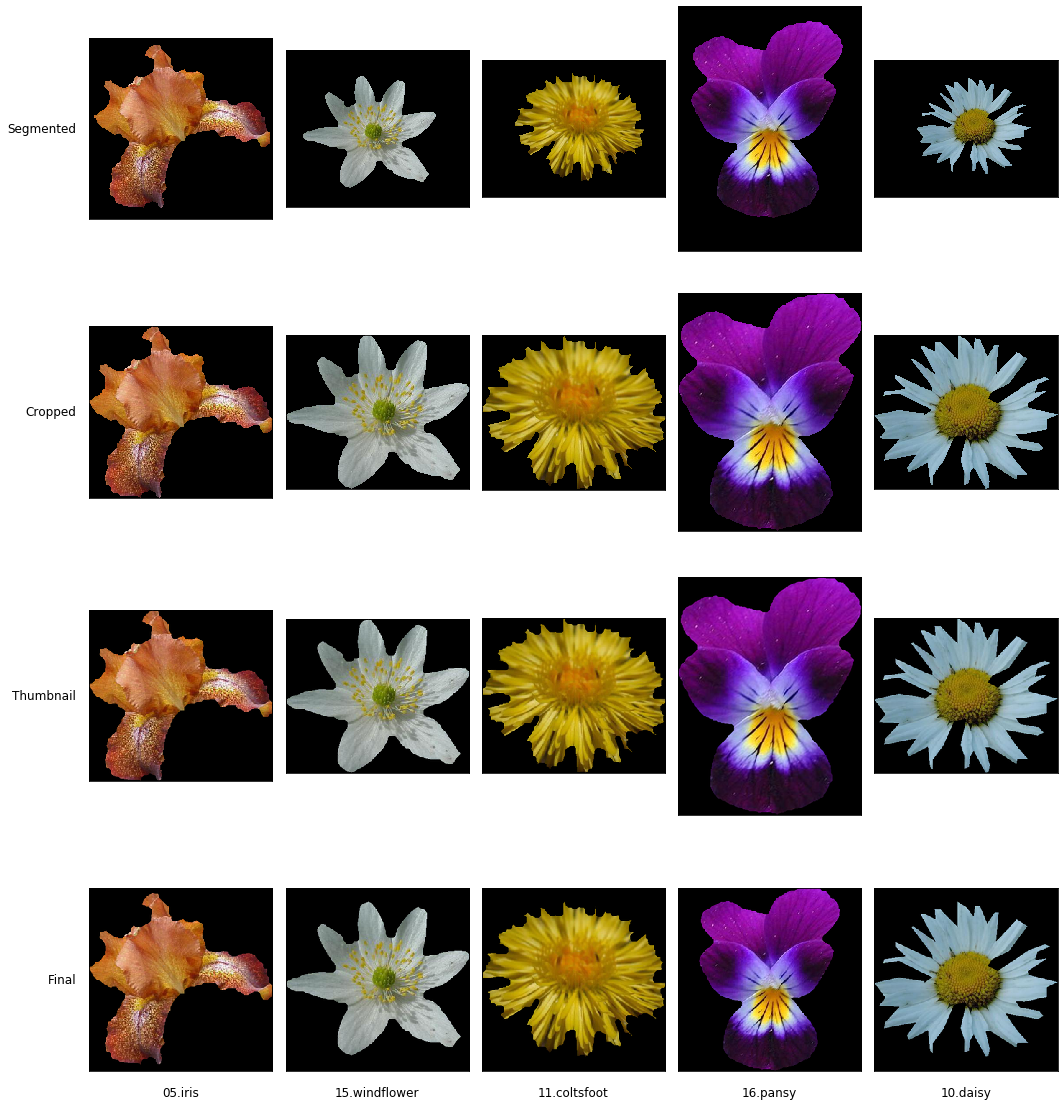

In [0]:
process_images(diagram=True)

In [0]:
process_images(diagram=False, debug=True)

In [0]:
x = list(range(0,17))
labels = [name for name in os.listdir('processed')]
labels.remove('.DS_Store')
labels.sort()
for label in labels:
  print("{}: \t {} images".format(label, len(os.listdir(dir_processed+'/'+label))))

00.daffodils: 	 71 images
01.snowdrop: 	 50 images
02.lilyvalley: 	 17 images
03.bluebell: 	 28 images
04.crocus: 	 50 images
05.iris: 	 77 images
06.tigerlily: 	 50 images
07.tulip: 	 41 images
08.fritillary: 	 65 images
09.sunflower: 	 71 images
10.daisy: 	 58 images
11.coltsfoot: 	 43 images
12.dandelion: 	 55 images
13.cowslip: 	 0 images
14.buttercup: 	 54 images
15.windflower: 	 61 images
16.pansy: 	 56 images
